In [19]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
import pandas as pd
import sys

In [20]:
sys.path.append('src/')
sys.path

['c:\\img_proc\\lab_img5',
 'C:\\Anaconda\\envs\\img5\\python310.zip',
 'C:\\Anaconda\\envs\\img5\\DLLs',
 'C:\\Anaconda\\envs\\img5\\lib',
 'C:\\Anaconda\\envs\\img5',
 '',
 'C:\\Anaconda\\envs\\img5\\lib\\site-packages',
 'C:\\Anaconda\\envs\\img5\\lib\\site-packages\\win32',
 'C:\\Anaconda\\envs\\img5\\lib\\site-packages\\win32\\lib',
 'C:\\Anaconda\\envs\\img5\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\gaygu\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'src/',
 'src/']

In [21]:
from my_mod import my_equalize

## 1 Histogram equalization

In [22]:
np.random.seed(25)
ar=np.random.randint(0,20,(4,4))
ar

array([[ 4, 15, 12, 18],
       [ 8,  4,  5,  1],
       [ 7,  3,  3, 13],
       [ 3,  1, 16, 15]])

In [23]:
pix,c=np.unique(ar,return_counts=True)
col=['pixel','counts']
table=np.c_[pix,c]
stat=pd.DataFrame(table,columns=col)
stat

,pixel,counts
0,1,2
1,3,3
2,4,2
3,5,1
4,7,1
5,8,1
6,12,1
7,13,1
8,15,2
9,16,1


## 1.2 cum sum

In [24]:
col=['pixel','counts','cum_sum']
c_sum=np.cumsum(c)

table=np.c_[pix,c,c_sum]

stat=pd.DataFrame(table,columns=col)
stat

,pixel,counts,cum_sum
0,1,2,2
1,3,3,5
2,4,2,7
3,5,1,8
4,7,1,9
5,8,1,10
6,12,1,11
7,13,1,12
8,15,2,14
9,16,1,15


In [25]:
ar.size

16

In [26]:
# cdf -func
col.append('cdf')
cdf=c_sum/ar.size

table=np.c_[pix,c,c_sum,cdf]

stat=pd.DataFrame(table,columns=col)
stat

,pixel,counts,cum_sum,cdf
0,1.0,2.0,2.0,0.1250
1,3.0,3.0,5.0,0.3125
2,4.0,2.0,7.0,0.4375
3,5.0,1.0,8.0,0.5000
4,7.0,1.0,9.0,0.5625
5,8.0,1.0,10.0,0.6250
6,12.0,1.0,11.0,0.6875
7,13.0,1.0,12.0,0.7500
8,15.0,2.0,14.0,0.8750
9,16.0,1.0,15.0,0.9375


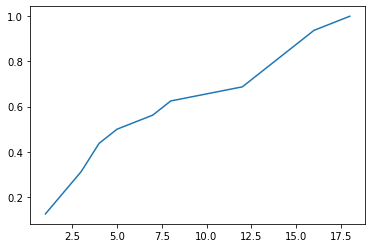

In [27]:
plt.plot(pix,cdf);

## Normalization

$L= 2^8 - 8 bits

In [28]:
L= 2**8-1
L

255

In [29]:
## y - new values of the pixels
y=((cdf-cdf.min())/(cdf.max()-cdf.min()))*L
y=np.round(y,0).astype(np.uint8)
y

array([  0,  55,  91, 109, 128, 146, 164, 182, 219, 237, 255], dtype=uint8)

In [30]:

col.append('new_pix')

table=np.c_[pix,c,c_sum,cdf,y]

stat=pd.DataFrame(table,columns=col)
stat

,pixel,counts,cum_sum,cdf,new_pix
0,1.0,2.0,2.0,0.1250,0.0
1,3.0,3.0,5.0,0.3125,55.0
2,4.0,2.0,7.0,0.4375,91.0
3,5.0,1.0,8.0,0.5000,109.0
4,7.0,1.0,9.0,0.5625,128.0
5,8.0,1.0,10.0,0.6250,146.0
6,12.0,1.0,11.0,0.6875,164.0
7,13.0,1.0,12.0,0.7500,182.0
8,15.0,2.0,14.0,0.8750,219.0
9,16.0,1.0,15.0,0.9375,237.0


## 1.4 Change image values

In [31]:
pix_map=dict(zip(pix,y))
pix_map

{1: 0,
 3: 55,
 4: 91,
 5: 109,
 7: 128,
 8: 146,
 12: 164,
 13: 182,
 15: 219,
 16: 237,
 18: 255}

In [32]:
ar_new=np.zeros_like(ar)

for pix,new in pix_map.items():
    idx = ar == pix
    ar_new[idx] = new
ar_new,ar

(array([[ 91, 219, 164, 255],
        [146,  91, 109,   0],
        [128,  55,  55, 182],
        [ 55,   0, 237, 219]]),
 array([[ 4, 15, 12, 18],
        [ 8,  4,  5,  1],
        [ 7,  3,  3, 13],
        [ 3,  1, 16, 15]]))

In [33]:
#exe: create a function to equalize image
def equalize(img):
    pix,c=np.unique(img,return_counts=True)
    col=['pixel','counts']
    table=np.c_[pix,c]
    stat=pd.DataFrame(table,columns=col)
    stat

    col=['pixel','counts','cum_sum']
    c_sum=np.cumsum(c)

    table=np.c_[pix,c,c_sum]

    stat=pd.DataFrame(table,columns=col)
    stat

    cdf=c_sum/img.size
    cdf

    L= 2**8-1
    L

    y=((cdf-cdf.min())/(cdf.max()-cdf.min()))*L
    y=np.round(y,0).astype(np.uint8)
    y

    col.append('new_pix')

    table=np.c_[pix,c,c_sum,cdf,y]

    stat=pd.DataFrame(table,columns=col)
    stat

    pix_map=dict(zip(pix,y))
    pix_map

    ar_new=np.zeros_like(img)

    for pix,new in pix_map.items():
        idx = img == pix
        ar_new[idx] = new
    ar_new,img

In [34]:
def equalize(ar):
    pix = np.unique(ar)
    cdf =  c_sum / ar.size
    y = ((cdf - cdf.min())/(cdf.max() - cdf.min())*255)

    pix_map = dict(zip(pix,y))
    ar_new = np.zeros_like(ar)
    
    for pix,new in pix_map.items():
        idx = ar == pix
        ar_new[idx] = new
    return ar_new

In [36]:
ar

array([[ 4, 15, 12, 18],
       [ 8,  4,  5,  1],
       [ 7,  3,  3, 13],
       [ 3,  1, 16, 15]])

In [37]:
def my_equalize(im):
    out = np.zeros_like(im)
    pix,c = np.unique(im,return_counts=True)
    c_sum=np.cumsum(c)
    cdf=c_sum/im.size

    L= 2**8-1
    y=((cdf-cdf.min())/(cdf.max()-cdf.min()))*L
    y=np.round(y,0).astype(np.uint8)

    pix_map=dict(zip(pix,y))
    
    for pix,new in pix_map.items():
        idx = im == pix
        out[idx] = new
    return out

In [44]:
%%writefile src/my_mod.py
import numpy as np
def my_equalize(im):
    out = np.zeros_like(im)
    pix,c = np.unique(im,return_counts=True)
    c_sum=np.cumsum(c)
    cdf=c_sum/im.size

    L= 2**8-1
    y=((cdf-cdf.min())/(cdf.max()-cdf.min()))*L
    y=np.round(y,0).astype(np.uint8)

    pix_map=dict(zip(pix,y))
    
    for pix,new in pix_map.items():
        idx = im == pix
        out[idx] = new
    return out


Overwriting src/my_mod.py


In [45]:
my_mod.my_equalize(ar)

NameError: name 'ar' is not defined

In [40]:
!vim src/my_mod.py

'vim' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [ ]:
xx=ar.copy()

In [ ]:
my_equalize(xx)


array([[ 91, 219, 164, 255],
       [146,  91, 109,   0],
       [128,  55,  55, 182],
       [ 55,   0, 237, 219]])

In [ ]:
%mkdir src

In [ ]:
#check my_mod
my_mod.my_equalize(xx)

NameError: name 'ar' is not defined

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [48]:
%cd imgs-main
%ls -gh

c:\img_proc\lab_img5\imgs-main
 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est FC72-9952

 R�pertoire de c:\img_proc\lab_img5\imgs-main



Fichier introuvable


3 Real imgs

In [49]:
%ls

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est FC72-9952

 R�pertoire de c:\img_proc\lab_img5\imgs-main

20/04/2022  18:21    <DIR>          .
20/04/2022  18:21    <DIR>          ..
20/04/2022  15:14           262�750 cameraman.tif
20/04/2022  15:14           525�106 house.tif
20/04/2022  15:14           525�106 lake.tif
20/04/2022  15:14           787�460 lena_color_512.tif
20/04/2022  15:14           262�598 lena_gray_512.tif
20/04/2022  15:14           262�750 livingroom.tif
20/04/2022  15:14           480�419 peppers_color.jpg
20/04/2022  15:14           526�654 peppers_color.tif
20/04/2022  15:14           525�106 peppers_gray.tif
20/04/2022  15:14           262�750 pirate.tif
20/04/2022  15:14           386�607 sent.jpg
20/04/2022  18:30    <DIR>          src
20/04/2022  15:14           525�106 walkbridge.tif
20/04/2022  15:14           262�750 woman_blonde.tif
              13 fichier(s)        5�595�162 octets
               3 R�p(s)  93�914�48

In [50]:
im1=np.array(Image.open('cameraman.tif'))
im2=np.array(Image.open('sent.jpg'))
im3=np.array(Image.open('pirate.tif'))

In [51]:
def img_show(im1,im2,h=0):
    plt.gray()
    if not h:
        f,axs=plt.subplots(1,2,figsize=(8,4))
        axs=axs.ravel()
        axs[0].imshow(im1)
        axs[1].imshow(im2)
    else:
        f,axs=plt.subplots(2,2,figsize=(8,8))
        axs=axs.ravel()
    
    
    axs[0].imshow(im1)
    axs[1].hist(im1.ravel(),bins=256)
    axs[2].imshow(im2)
    axs[3].hist(im2.ravel(),bins=256)


<Figure size 432x288 with 0 Axes>

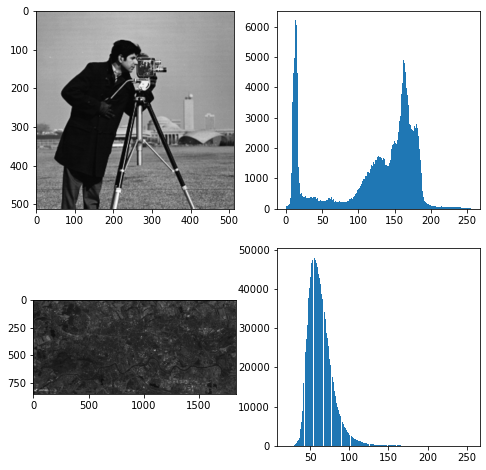

In [52]:
# im2[:,:,0]
img_show(im1,im2[...,0],h=1)

<Figure size 432x288 with 0 Axes>

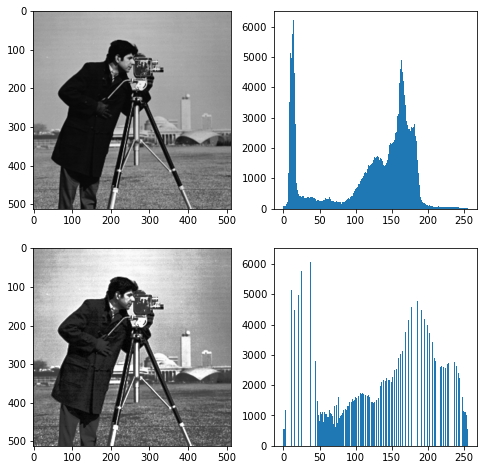

In [53]:
im1_e=my_equalize(im1)
img_show(im1,im1_e,h=1)

In [54]:
im1.shape, im2.shape, im3.shape

((512, 512), (848, 1840, 3), (512, 512))

<Figure size 432x288 with 0 Axes>

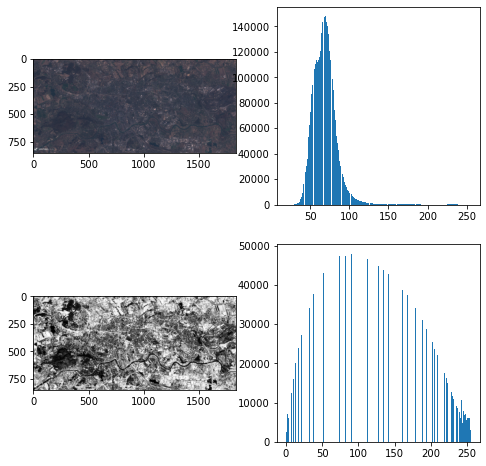

In [55]:
im2_e=my_equalize(im2[...,0])
img_show(im2,im2_e,h=1)

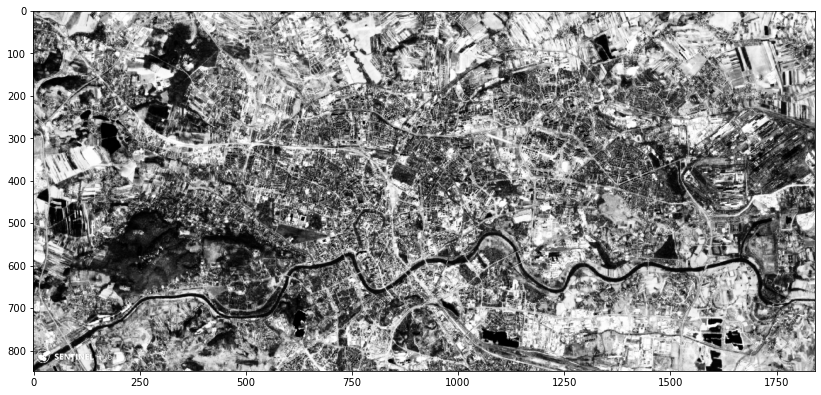

In [56]:
f=plt.figure(figsize=(14,8))
plt.imshow(im2_e,cmap='gray')

<Figure size 432x288 with 0 Axes>

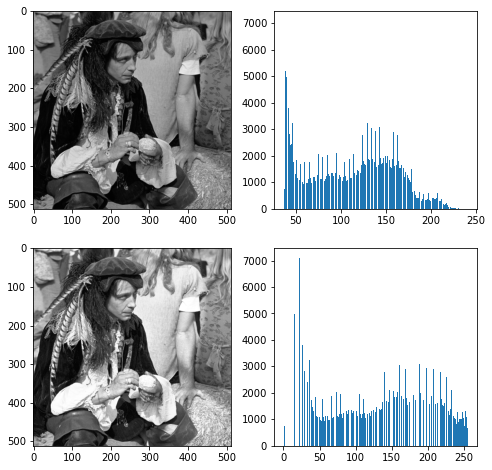

In [57]:
im3_e=my_equalize(im3)
img_show(im3,im3_e,h=1)

In [ ]:
## 4 Compare stretching vs equalization
#create function for linear stretching



In [58]:
def my_stret(im,opt,p):
    out = im.copy()

    perc = np.percentile(im,[p,100-p])
    coef = np.polyfit(perc, [0,255],1)
    pl = np.poly1d(coef)

    out = pl(out)
    if opt == 1:
        # cut both
        out[out<0] = 0
        out[out>255] = 255
    elif opt == 2:
        # cut left
        out[out<0] = 0
    else:
        # cut right
        out[out>255] = 255

    return out

In [ ]:
def my_equalize(ar):
    pix,c = np.unique(ar, return_counts=True)
    c_sum = np.cumsum(c)
    cdf =  c_sum / ar.size
    y = ((cdf - cdf.min())/(cdf.max() - cdf.min()))*255

    pix_map = dict(zip(pix,y))
    out = np.zeros_like(ar)

    for pix,new in pix_map.items():
        idx = ar == pix
        out[idx] = new
    return out
    
def img_show(im1, im2, h=0):
    plt.gray()
    if not h:
        f,axs = plt.subplots(1,2,figsize=(4,4))
        axs = axs.ravel()
        axs[0].imshow(im1)
        axs[1].imshow(im2)
    else:
        f,axs = plt.subplots(2,2,figsize=(8,8))
        axs = axs.ravel()

        axs[0].imshow(im1)
        axs[1].hist(im1.ravel(), bins=256)
        axs[2].imshow(im2)
        axs[3].hist(im2.ravel(), bins=256)

<Figure size 432x288 with 0 Axes>

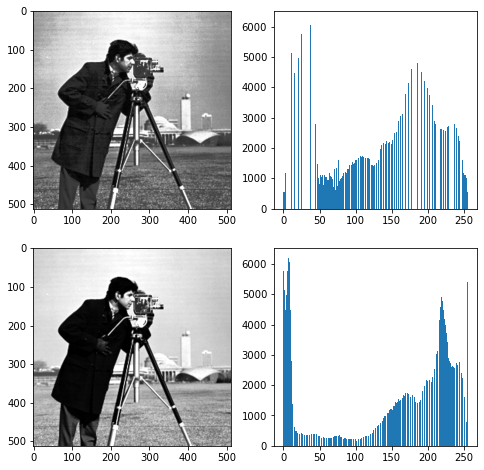

In [59]:
im1_s=my_stret(im1,1,2)
img_show(im1_e,im1_s,h=1)

<Figure size 432x288 with 0 Axes>

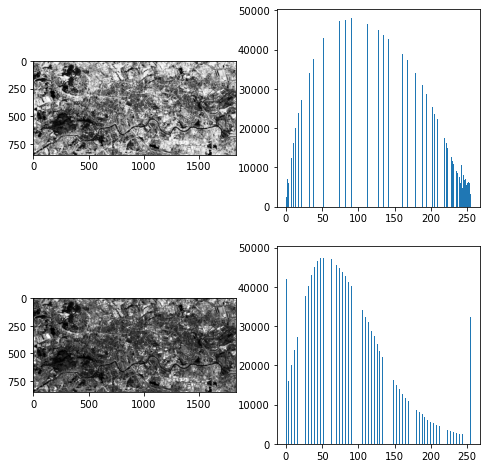

In [60]:
im2_s=my_stret(im2[...,0],1,2)
img_show(im2_e,im2_s,h=1)

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import ipywidgets as widgets 
import pandas as pd
import sys from pathlib import Path
ad = Path('src/').resolve() sys. path.insert(0, str(ad))



1 Eq:

y= a*x + b

-> 1: 0= a * 50 + b
-> 2: 255= a * 173 + b

In [ ]:
def st1(im:'np.array'):
    x_min = ar.min()
    x_max=ar.max()

    y_min=0
    y_max=255

# y min = a * x min + b 
# y max = a * x max + b 
# ymax - y min = a * (x max - x min) 
# a = (y_max - y_min) / (x_max - x_min) 
# b = y max - a * x max
a = (y_max - y_min) / (x_max - x_min) 
b = y_max - a * x_max
out = np. round (al * im + bc)
return out.astype (np.uint8)

In [ ]:
#std1 with im1

im1_s=st1(im1)
my_mod.show_img(im1,im1_s,hist=1)

In [ ]:
im1.min(),im1.max(),im1_s.min(),im1_s.max(),

NameError: name 'im1' is not defined